In [ ]:
#while reading image the parameter is to read in gray scale and 1 is to red in color scale

In [1]:
#Graadients and canny  edge detection
import cv2
import numpy as np

cap=cv2.VideoCapture(0)

while True:
    ret,frame=cap.read()
    hsv=cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    
    #laplacian
    #a type of edge detection
    laplacian=cv2.Laplacian(frame,cv2.CV_64F)
    
    #sobelx-third parameter =1(x-parameter) and fourth is 0(y-parameter)
    #edge detection horizontally
    sobelx = cv2.Sobel(frame,cv2.CV_64F,1,0,ksize=5)
    
    #sobel4-third parameter =0(x-parameter) and fourth is 1(y-parameter)
    #edge detection vertically
    sobely = cv2.Sobel(frame,cv2.CV_64F,0,1,ksize=5)
    
    #canny edge detection
    #best sed and one of best for edge detection
    #mainly shows edges which  are in bright and can be visible 
    edges = cv2.Canny(frame,100,200)
    
    cv2.imshow("frame",frame)
    #cv2.imshow("hsv",hsv)
    #cv2.imshow("gray",gray)
    #cv2.imshow("laplacian",laplacian)
    cv2.imshow("sobelx",sobelx)
    cv2.imshow("sobely",sobely)
    cv2.imshow("edges",edges)


    if cv2.waitKey(1) & 0xff==ord("q"):
        break
cv2.destroyAllWindows()
cap.release()

In [2]:
#houge gradient
#called as houge circles which used to detect the circular objects

import cv2
import numpy as np

planets	= cv2.imread('opencv-logo.png')
gray_img=cv2.cvtColor(planets,cv2.COLOR_BGR2GRAY)
img	= cv2.medianBlur(gray_img,5)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)


circles	= cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,120,param1=100,param2=30,minRadius=0,maxRadius=0)
circles	= np.uint16(np.around(circles))

for	i in circles[0,:]:
    #	draw	the	outer	circle
    cv2.circle(planets,(i[0],i[1]),i[2],(0,255,0),6)
    #draw	the	center	of	the	circle
    cv2.circle(planets,(i[0],i[1]),2,(0,0,255),3)


cv2.imshow("HoughCirlces",	planets)
cv2.waitKey(0)
cv2.destroyAllWindows()

TypeError: loop of ufunc does not support argument 0 of type NoneType which has no callable rint method

In [3]:
#template matching
#like image detection in a multiple image

import cv2
import numpy as np

img_rgb = cv2.imread('opencv-template-matching-python-tutorial.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

template = cv2.imread('opencv-template-for-matching.jpg',0)
w, h = template.shape[::-1]

res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)

#zip(*loc[::-1]) =this is for reversing and adding like a point
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,255,255), 2)

cv2.imshow('Detected',img_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()

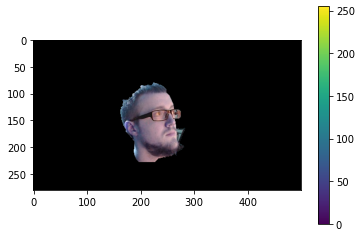

In [4]:
#GrabCut Foreground Extraction
#try to use for video also

import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('tutor.jpg')
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (161,79,150,150)

#the below line of code the mask ,bgbgdModel,fgbfgdModel vaules
#after this code the mask contains only 0,2,3 where 0,2 indicate the background and 3 infdicate foreground 
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
#here we are maaking only foreground pixels of value 3 into 1 nad remaining all to 0 so that we will gwt a mask 
#where only the pixels which wre needed are 1 and reamining are 0
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

plt.imshow(img)
plt.colorbar()
plt.show()

array([0, 2, 3], dtype=uint8)

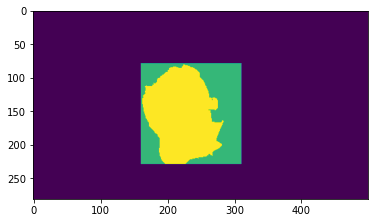

In [55]:
plt.imshow(mask)
np.unique(mask)

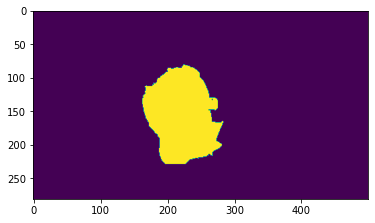

In [38]:
plt.imshow(mask2)

In [5]:
#corner detection

import cv2
import numpy as np

img=cv2.imread("opencv-template-matching-python-tutorial.jpg",1)
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray=np.float32(gray)


#corners contain an arraay of all the detected  corners
corners=cv2.goodFeaturesToTrack(gray,2000,0.04,5)
corners=np.uint0(corners)

for corner in corners :
    #taking x,y value from corners
    x,y=corners[0][0]
    cv2.circle(img,(x,y),5,(255,225,0),-1)
    
    
cv2.imshow("corners_detected",img)
cv2.waitKey(0)
cv2.destroyAllWindows()



In [2]:
#contours
import cv2
import numpy as np

cap=cv2.VideoCapture(0)
while True:
    ret,frame=cap.read()
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    
    canny=cv2.Canny(gray,30,200)
    contours,heirarcy=cv2.findContours(canny,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    cv2.imshow("canny",canny)
    
    cv2.drawContours(frame,contours,-1,(255,0,0),2)
    cv2.imshow("contours",frame)
    
    if cv2.waitKey(1)&0xff==ord("q"):
        break
cv2.destroyAllWindows()
cap.release()

In [5]:
#corner detection for video
import cv2
import numpy as np

cap=cv2.VideoCapture(0)
while True:
    
    ret,img=cap.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    gray=np.float32(gray)


    #corners contain an arraay of all the detected  corners
    corners=cv2.goodFeaturesToTrack(gray,200,0.04,5)
    corners=np.uint0(corners)

    for corner in corners :
        #taking x,y values from corners
        x,y=corners[0][0]
        cv2.circle(img,(x,y),10,255,-1)


    cv2.imshow("corners_detected",img)
    if cv2.waitKey(1)&0xff==ord("q"):
        break
cv2.destroyAllWindows()
cap.release()
    

    


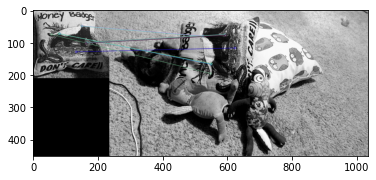

In [14]:
#feature matching

import cv2
import numpy as np
import matplotlib.pyplot as plt

img1=cv2.imread("feature_detection_features.jpg",0)
img2=cv2.imread("feature_detection_original.jpg",0)

orb = cv2.ORB_create()

kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

matches = bf.match(des1,des2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10],None, flags=2)
plt.imshow(img3)
plt.show()

In [3]:
#MOG background reduction for video
#detects the moving part of the frame
import cv2
import numpy as np

cap= cv2.VideoCapture(0)
fgbg=cv2.createBackgroundSubtractorMOG2()
while True :
    ret,frame= cap.read()
    fgmask=fgbg.apply(frame)
    
    cv2.imshow("frame",frame)
    cv2.imshow("edited",fgmask)
    
    if cv2.waitKey(1) &0xff ==ord("q"):
        break
        
cv2.destroyAllWindows()
cap.release()

In [4]:
#same as before but by using KNN algorithm
import cv2
import numpy as np

cap= cv2.VideoCapture(0)
fgbg=cv2.createBackgroundSubtractorKNN()
while True :
    ret,frame= cap.read()
    fgmask=fgbg.apply(frame)
    
    cv2.imshow("frame",frame)
    cv2.imshow("edited",fgmask)
    
    if cv2.waitKey(1) &0xff ==ord("q"):
        break
        
cv2.destroyAllWindows()
cap.release()

In [5]:
#haarcascade detection
#thhis is like detection of various  things in a pic or video

import cv2
import numpy as np

face_cascade=cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye.xml')


cap = cv2.VideoCapture(0)
while True :
    ret,frame=cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
    cv2.imshow("frame",frame)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()